In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
#Assign csv file path to variable
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#Read csv file
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# #Test to see a sample of the 2 dataframes
# print(mouse_metadata.head(3))
# print(study_results.head(3))

# Combine the data into a single dataset
mouse_merged=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
print("Number of rows before removing duplicates:")
print(mouse_merged.count()["Mouse ID"])
# Display the data table for preview
mouse_merged

Number of rows before removing duplicates:
1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
 # Merged and uncleaned Data. 
 # Checking the number of mice rows in dataframe
 number_of_rows=mouse_merged["Mouse ID"].count()
 print(f"Number of rows before clean: {number_of_rows}")

Number of rows before clean: 1893


In [4]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
##View all rows which are duplicated for subset Mouse ID and Timepoint: duplicated_rows. keep=False will print out everything duplicated including first and last occurence. Else, remove it to see only the duplicates aftr first occurence that is intended to be deleted.
 
duplicated_rows=mouse_merged[mouse_merged.duplicated(["Mouse ID","Timepoint"],keep=False)]
print(duplicated_rows)

#Number of rows to be deleted. Code using keep=True
duplicated_rows=mouse_merged[mouse_merged.duplicated(["Mouse ID","Timepoint"])]
duplicated_rows
print("\nNumber of duplicated rows to be deleted:")
print(duplicated_rows.count()["Mouse ID"])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [5]:
##CLEAN, MERGED DATA ##
#Remove duplicate rows, keep the first duplicated row and remove the others (keep="first": default API ref does this already)
clean_merged=mouse_merged.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Merged and cleaned Data. 
# Checking the number of mice rows in dataframe
number_of_rows=clean_merged["Mouse ID"].count()
print(f"Number of rows after clean: {number_of_rows}")

Number of rows after clean: 1888


SUMMARY STATISTICS

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Make a copy of the clean_merged dataframe
clean_grouped=clean_merged.copy()
clean_grouped

#Group by Drug Regimen types
regimen=clean_grouped.groupby(["Drug Regimen"])

#Attain for volume, the mean
mean=regimen.mean()["Tumor Volume (mm3)"]
print(f"Mean of Tumor Volume:\n{mean}\n")

#Attain for volume, the median
median=regimen.median()["Tumor Volume (mm3)"]
print(f"Median of Tumor Volume:\n{median}\n")

#Attain for volume, the variance
variance=regimen.var()["Tumor Volume (mm3)"]
print(f"Variance of Tumor Volume:\n{variance}\n")

#Attain for volume, the standard deviation
std_dev=regimen.std()["Tumor Volume (mm3)"]
print(f"Standard Deviation of Tumor Volume:\n{std_dev}\n")

#Attain for volume, the standard error of the mean of the groups
std_error=regimen.sem()["Tumor Volume (mm3)"]
print(f"Standard Error of the Mean of Tumor Volume:\n{std_error}\n")

Mean of Tumor Volume:
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

Median of Tumor Volume:
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

Variance of Tumor Volume:
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

Standard Deviation of Tumor Volume:
Drug Regimen
Capomulin    4.994774
Ce

BAR AND PIE CHARTS

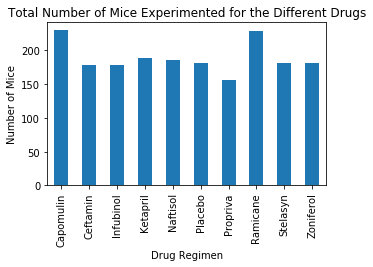

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Count number of nice in each Drug Regimen category
regimen_total_mice=regimen.count()["Mouse ID"]
regimen_total_mice

#Use DataFrame.plot() in order to create a bar chart of the data
regimen_total_mice.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Total Number of Mice Experimented for the Different Drugs")
plt.ylabel("Number of Mice");
#Show plot
plt.show()
#Layout
plt.tight_layout()